In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

placements_merge2 = pd.read_csv('dataset_w_outcome.csv', encoding='ISO-8859-1')

## Multiple Regression

In [92]:
# Use Pandas get_dummies to convert categorical data

# placements_merge2 = pd.get_dummies(placements_merge2)

placements_merge2.head()

,Country,Year,Wins,Losses,Draws,Points Scored,Points Against,Ttl Games,Win Pct,PPG,position,ATT,MID,DEF,OVR,Finalist,Winner
0,Belgium,1930,0,2,0,0,4,2,0.000000,0.000000,0,0,0,0,0,0,0
1,Belgium,1934,0,1,0,2,5,1,0.000000,2.000000,0,0,0,0,0,0,0
2,Belgium,1938,0,1,0,1,3,1,0.000000,1.000000,0,0,0,0,0,0,0
3,Belgium,1954,0,1,1,5,8,2,0.000000,2.500000,0,0,0,0,0,0,0
4,Belgium,1970,1,2,0,4,5,3,0.333333,1.333333,0,0,0,0,0,0,0


In [93]:
# Assign X (data) and y (target)

# X = placements_merge2[["Win_Percent","Points_Scored","ATT","MID","DEF","OVR"]]
# y = placements_merge2["Placement"].values.reshape(-1, 1)
X = placements_merge2[["PPG",'Points Scored', 'Win Pct', 'Wins']]
y = placements_merge2["Finalist"].values.reshape(-1, 1)
print(X.shape, y.shape)

(422, 4) (422, 1)


In [94]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

C:\Users\jdgon\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [96]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\jdgon\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [97]:
# Create a LinearRegression model and fit it to the scaled training data

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

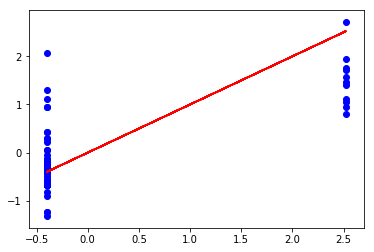

In [98]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
plt.plot(y_test_scaled, y_test_scaled, c='red')
plt.scatter(y_test_scaled, predictions, c='blue')
plt.show()

In [99]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3494914792652485, R2: 0.5582373755225263


In [100]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.3494914792652485, R2: 0.5582373755225263
